In [1]:
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import cv2, os
from  matplotlib import pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from resnet import build_delta_resnet_backbone
import torch
# from deltacnn import DCConv2d, DCBackend
from torch.utils.tensorboard import SummaryWriter
# PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:1000
# DCConv2d.backend = DCBackend.deltacnn
os.environ['PYTORCH_NO_CUDA_MEMORY_CACHING'] = "1"
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

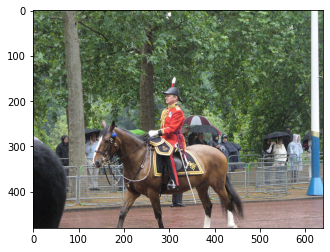

In [2]:
im = cv2.imread("./input.jpg")
# im = cv2.resize(im, dsize=(80, 60))
im2 = im[:,:,::-1] 
plt.imshow(im2)
plt.show()

In [3]:
model = torch.load('delta_resnet50.pth', map_location='cpu')

In [4]:
with torch.no_grad():
    outputs = model(im)

d:\Samsung\Delta-Detectron2\deltacnn\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [5]:
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.MODEL.ROI_HEADS.NAME = 'DeltaRes5ROIHeads'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE='cpu'

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")

In [11]:
cfg.MODEL.BACKBONE.NAME = 'build_delta_resnet_backbone'
cfg.MODEL.WEIGHTS = "D:/Samsung/Delta-Detectron2/faster-rcnn_resnet50_channel_last.pkl"
predictor = DefaultPredictor(cfg)
torch.save(predictor, 'delta_resnet50.pth')

Some model parameters or buffers are not found in the checkpoint:
backbone.res2.0.conv1.norm.num_batches_tracked
backbone.res2.0.conv2.norm.num_batches_tracked
backbone.res2.0.conv3.norm.num_batches_tracked
backbone.res2.0.shortcut.norm.num_batches_tracked
backbone.res2.1.conv1.norm.num_batches_tracked
backbone.res2.1.conv2.norm.num_batches_tracked
backbone.res2.1.conv3.norm.num_batches_tracked
backbone.res2.2.conv1.norm.num_batches_tracked
backbone.res2.2.conv2.norm.num_batches_tracked
backbone.res2.2.conv3.norm.num_batches_tracked
backbone.res3.0.conv1.norm.num_batches_tracked
backbone.res3.0.conv2.norm.num_batches_tracked
backbone.res3.0.conv3.norm.num_batches_tracked
backbone.res3.0.shortcut.norm.num_batches_tracked
backbone.res3.1.conv1.norm.num_batches_tracked
backbone.res3.1.conv2.norm.num_batches_tracked
backbone.res3.1.conv3.norm.num_batches_tracked
backbone.res3.2.conv1.norm.num_batches_tracked
backbone.res3.2.conv2.norm.num_batches_tracked
backbone.res3.2.conv3.norm.num_batc

In [9]:
torch.cuda.empty_cache()
# with torch.cuda.amp.autocast():
outputs = predictor(im)

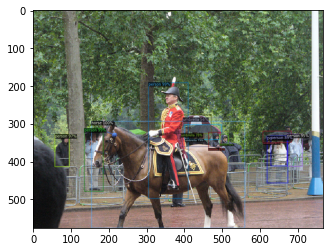

True

In [10]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
out_img = out.get_image()
plt.imshow(out_img)
plt.show()
cv2.imwrite('out_img.jpg', out_img[:,:,::-1])

In [ ]:
outputs = predictor(im)

In [12]:
torch.save(predictor, 'delta_faster-rcnn_resnet50.pth')